# Information
$Writer:{\;}Junhyuck{\;}Woo
\\ Std. ID: 20145337
\\Project:{\;}K-means{\;}Clustering$

# import library

In [1]:
from collections import Counter
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import random as rd

# Load file

In [2]:
file_data1  = "mnist_train.csv"
file_data2 = "mnist_test.csv"
handle_file1= open(file_data1, "r")
train_data         = handle_file1.readlines()
handle_file2=open(file_data2, "r")
test_data          = handle_file2.readlines()
handle_file1.close()
handle_file2.close()

# Global parameter

In [3]:
size_row = 28        # height of the image
size_col  = 28         # width of the image
num_train = len(train_data)
num_test = len(test_data)
count          = 0     # count for the number of images
cluster  = 0;

pre_list_label  = np.empty(num_train, dtype=int)
cluster_label = np.empty(num_train, dtype=int)

train_image  = np.empty((size_row * size_col, num_train), dtype=float)
train_label  = np.empty(num_train, dtype=int)

test_image  = np.empty((size_row * size_col, num_test), dtype=float)
test_label = np.empty(num_test, dtype=int)


# Function: normalize the values of the input data to be [0, 1]

In [4]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Function: Distance between two vectors x and y

In [5]:
def distance(x, y):

    d = (x - y) * (x - y)
    s = np.sum(d)
    r = np.sqrt(s)

    return(s)

# Function: Visualizer

In [6]:
def visualizer(k, data, data_label):
    f1 = plt.figure(1)
    for i in range(k):

        im_vector   = data[:, i]
        im_matrix   = im_vector.reshape((size_row, size_col))

        plt.subplot(1, k, i+1)
        plt.title(data_label[i])
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    plt.show()

# Function: Initialize centroid

In [7]:
def initialize_centroid(k, data, data_label, num_data):
    centroid_label = np.empty(num_data, dtype=int)
    
    # clustering
    for i in range(num_data):
        label = rd.randint(1, k) - 1
        centroid_label[i] = label
    
    return(centroid_label)

# Function: Calculate centroid

In [8]:
def calculate_centroid(k, train_data, train_label, centroid_label, num_train):
    
    centroid = np.zeros((size_row * size_col, k), dtype=float)
    count = np.zeros(k,dtype=int)
    
    # Create centroid image
    for i in centroid_label:
        centroid[:,i] = centroid[:,i] + train_data[:, sum(count)]
        count[i] += 1
    
    for i in range(k):
        if (count[i] != 0):
            centroid[:, i] /= count[i]
            centroid[:, i] = normalize(centroid[:, i])

    return(centroid)

# Function: Clustering data

In [9]:
def clustering(k, train_image, centroid, num_train):
    cluster_label = np.empty(num_train,dtype=int)
    dist = np.empty(k, dtype=float)
    
    for i in range(num_train):
        for j in range(k):
            dist[j] = distance(train_image[:, i], centroid[:, j])
        cluster_label[i] = np.argmin(dist)

    return cluster_label

# Function: Find label

In [10]:
def labeling(k, cluster_label, data_label, num_data):
    real_label = np.zeros(k, dtype=int)
    label_check = np.zeros((k, 10), dtype=int)
    for i in range(num_data):
        label_check[cluster_label[i], data_label[i]] += 1
        
    for i in range(k):
        real_label[i] = np.argmax(label_check[i,:])

    return real_label

# Function: K Means algorithms

In [11]:
def k_means(k, train_data, train_label, num_train):
    iteration = 0
    energy = []
    train_accuracy = []
    test_accuracy = []
    real_label = np.empty(k, dtype=int)
    
    previous_label = np.zeros(num_train, dtype=int)
    centroid_label = initialize_centroid(k, train_data, train_label, num_train)
    
    while (~np.all(previous_label == centroid_label)):
        iteration+=1
        
        centroid = calculate_centroid(k, train_data, train_label, centroid_label, num_train)
        
        # check traaining energy
        energy.append(calculate_energy(train_data, num_train, centroid, centroid_label))
        
        # check training accuracy
        train_accuracy.append(calculate_accuracy(k, centroid_label, train_label, num_train))
        
        # check testing accuracy
        testing_label = clustering(k, test_image, centroid, num_test)
        test_accuracy.append(calculate_accuracy(k, testing_label, test_label, num_test))

        previous_label = centroid_label
        centroid_label = clustering(k, train_image, centroid, num_train)
    
        
    # Visualize K centroid images for each category.
    real_label = labeling(k, testing_label, test_label, num_test)
    visualizer(k, centroid, real_label)
        
    # Plot the training energy per optimization iteration.
    plt.plot(energy, label='Training Energy')
    plt.legend(loc='lower right')
    plt.show()
    
    # Plot the training accuracy per optimization iteration.
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.legend(loc='lower right')
    plt.show()
    
    # Plot the testing accuracy per optimization iteration.
    plt.plot(test_accuracy, label='Testing Accuaracy')
    plt.legend(loc='lower right')
    plt.show()

# Function: Energy
${{\sum}_{k = 1}^K \| x_i - c_{k_i} \|^2}
\\ where{\;}{k_i}{\;}denotes{\;}the{\;}category{\;}of{\;}{x_i},{\;}and{\;}c_{k_i}{\;}denotes{\;}the{\;}centroid{\;}of{\;}category{\;}{x_i}$

In [12]:
def calculate_energy(train_data, num_train, centroid, centroid_label):
    energy = 0
    
    for i in range(num_train):
        energy += distance(train_data[:,i], centroid[:,centroid_label[i]])
        
    return(energy)

# Function: Accurate
${\frac{{\sum}_{k = 1}^K m_k}{N}}
\\ where{\;}N{\;}denotes{\;}the{\;}total{\;}number{\;}of{\;}data{\;}and{\;}m_k{\;}denotes{\;}the{\;}number{\;}of{\;}data{\;}with{\;}majority{\;}for{\;}category{\;}k$.

In [13]:
def calculate_accuracy(k, cluster_label, data_label, num_data):
    label_check = np.zeros((k, 10), dtype=int)
    count = 0

    for i in range(num_data):
        label_check[cluster_label[i], data_label[i]] += 1
    
    for i in range(num_data):
        if(data_label[i] == np.argmax(label_check[cluster_label[i],:])):
            count += 1
            
    return count/num_data

# Preprocessing data / devide label and data

In [14]:
count = 0

for line in train_data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    train_label[count]       = label
    train_image[:, count]    = im_vector
    count += 1

count = 0
for line in test_data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    test_label[count]       = label
    test_image[:, count]    = im_vector
    count += 1

# K = 5

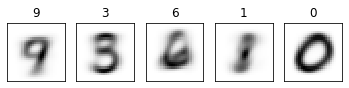

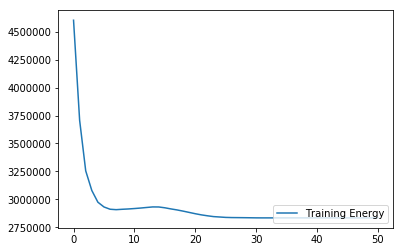

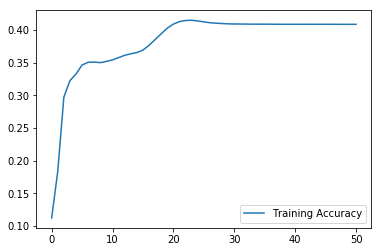

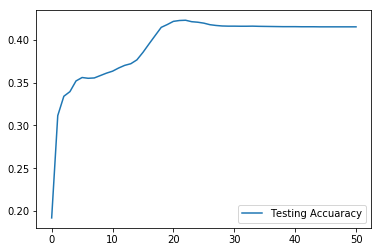

In [15]:
k=5
k_means(k, train_image, train_label, num_train)

# K = 10

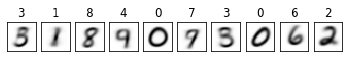

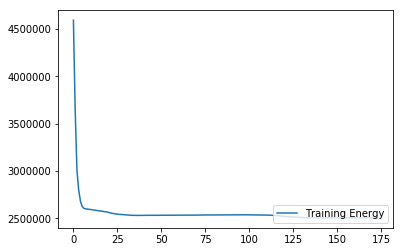

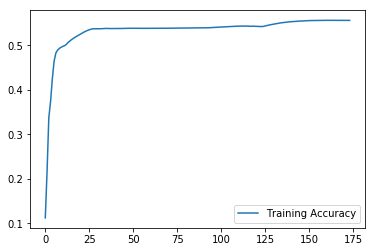

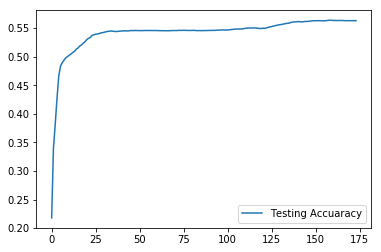

In [16]:
k=10
k_means(k, train_image, train_label, num_train)

# K = 15

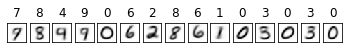

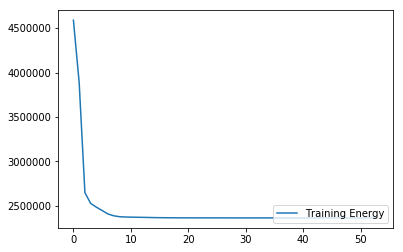

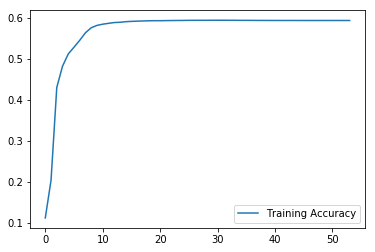

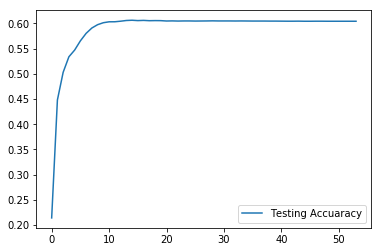

In [17]:
k=15
k_means(k, train_image, train_label, num_train)

# K = 20

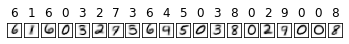

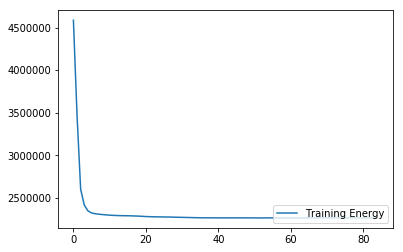

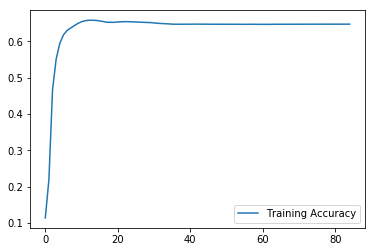

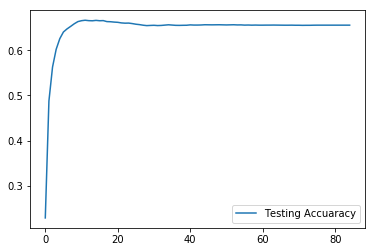

In [18]:
k=20
k_means(k, train_image, train_label, num_train)